In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
dataset=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
dataset.head()
dataset.shape

(10000, 13)

In [176]:
dataset.duplicated(['CustomerId']).sum()

0

In [177]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [178]:
dataset.replace({'Geography':{'France':1,'Germany':2,'Spain':0}},inplace=True)

In [179]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [180]:
dataset.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

In [181]:
dataset['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [182]:
dataset['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [183]:
dataset['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [184]:
dataset.loc[(dataset['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [185]:
dataset.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [186]:
dataset['Zero Balance']=np.where(dataset['Balance']>0,1,0)

<Axes: >

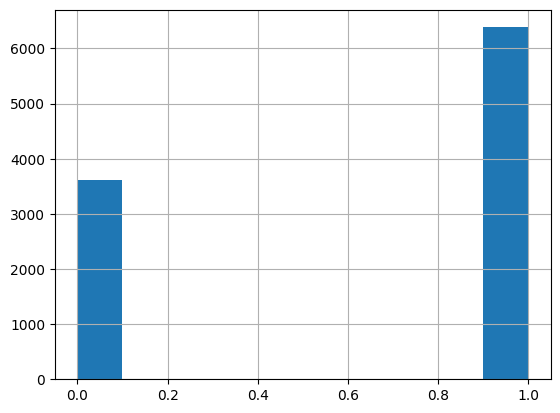

In [187]:
dataset['Zero Balance'].hist()

In [188]:
dataset.groupby(['Churn', 'Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                4204     4204         4204    4204  4204    4204   
      2                1695     1695         1695    1695  1695    1695   
1     0                 413      413          413     413   413     413   
      1                 810      810          810     810   810     810   
      2                 814      814          814     814   814     814   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             4204             4204             4204              4204   
      2             1695             1695             1695              1695   
1     0              413              413              413               413   
      1              810              810              810               810   
      2              814              814              814               814   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      4204          4204  
      2                      1695          1695  
1     0                       413           413  
      1                       810           810  
      2                       814           814

In [189]:
dataset.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [190]:
#Segregatting the Data
y=dataset['Churn']
x=dataset.drop(['Surname','Churn'],axis=1)

In [191]:
dataset['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

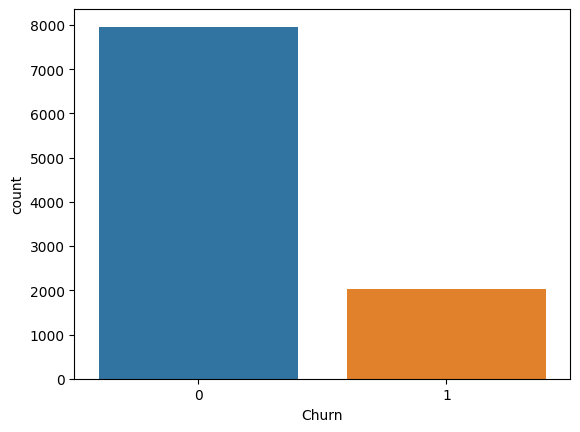

In [192]:
sns.countplot(x = 'Churn', data = dataset)

In [193]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 2529)
x_rus, y_rus = rus.fit_resample(x, y)
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [194]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [195]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

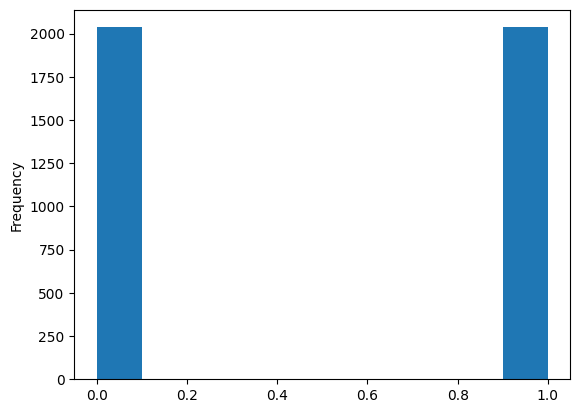

In [196]:
y_rus.plot(kind = 'hist')

**Splitting the DAta Train and Test**

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 252)

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# Creating a Model 

In [199]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [200]:
y_pred = model.predict(x_test)

In [201]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
confusion_matrix(y_test, y_pred)

array([[2350,    0],
       [ 650,    0]])

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2350
           1       0.00      0.00      0.00       650

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.69      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
print("Accuracy of the model{}%".format(accuracy_score(y_pred,y_test)*100))

Accuracy of the model78.33333333333333%


# Hyper parameter Tunning

In [213]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1, 1, 10], 'gamma' : [1, 0.1, 0.01], 'kernel' : ['rbf'], 'class_weight' : ['balanced']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [212]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [211]:
grid_predictions = grid.predict(x_test)

In [210]:
confusion_matrix(y_test,grid_predictions)

array([[2350,    0],
       [ 650,    0]])

In [214]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2350
           1       0.00      0.00      0.00       650

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.69      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
print("Accuracy of the model {}%".format(accuracy_score(grid_predictions,y_test)*100))

Accuracy of the model 78.33333333333333%
